#### Akter 2021 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Akter 2021 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230308**

### Import required modules


In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
import pybiomart as biomart
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
j

### Read in datasets

##### Control data

###### Uninfected rep 1

In [3]:
adata_1 = sc.read_10x_mtx('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/uninfected_rep1/')
adata_1

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 3985 × 27998
    var: 'gene_ids', 'feature_types'

###### Uninfected rep 2

In [4]:
adata_2 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/uninfected_rep2/')
adata_2

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 4198 × 27998
    var: 'gene_ids', 'feature_types'

##### infected_d50

###### rep_1


In [5]:
adata_3 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/infected_d50_rep1/')
adata_3

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 5401 × 27998
    var: 'gene_ids', 'feature_types'

###### rep_2


In [6]:
adata_4 = sc.read_10x_mtx('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/infected_d50_rep2/')
adata_4

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 6149 × 27998
    var: 'gene_ids', 'feature_types'

###### rep_3


In [7]:
adata_5 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/infected_d50_rep3/')
adata_5

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 5494 × 27998
    var: 'gene_ids', 'feature_types'

##### infected_day100


###### rep_1


In [8]:
adata_6 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/infected_d100_rep1/')
adata_6


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 5894 × 27998
    var: 'gene_ids', 'feature_types'

###### rep_2


In [9]:
adata_7 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/infected_d100_rep2/')
adata_7


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 6219 × 27998
    var: 'gene_ids', 'feature_types'

###### rep_3


In [10]:
adata_8 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/akter_2021/GSE200639_RAW/infected_d100_rep3/')
adata_8


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 5764 × 27998
    var: 'gene_ids', 'feature_types'

### Name names unique

In [11]:
adata_1.var_names_make_unique()
adata_2.var_names_make_unique()
adata_3.var_names_make_unique()
adata_4.var_names_make_unique()
adata_5.var_names_make_unique()
adata_6.var_names_make_unique()
adata_7.var_names_make_unique()
adata_8.var_names_make_unique()

### Concatenate objects

In [12]:
adata_total = adata_1.concatenate(adata_2, adata_3, adata_4, adata_5, adata_6, adata_7, adata_8, join="inner", batch_key="batch")
adata_total

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 43104 × 27998
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

- Remove extra objects

In [13]:
del adata_1
del adata_2
del adata_3
del adata_4
del adata_5
del adata_6
del adata_7
del adata_8

### Replace gene symbols

In [14]:
sample_object = adata_total.copy()
sample_object


AnnData object with n_obs × n_vars = 43104 × 27998
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

In [15]:
sample_object.var['gene_name'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_ids    feature_types
gene_name                                     
Xkr4       ENSMUSG00000051951  Gene Expression
Gm1992     ENSMUSG00000089699  Gene Expression
Gm37381    ENSMUSG00000102343  Gene Expression
Rp1        ENSMUSG00000025900  Gene Expression
Rp1-1      ENSMUSG00000109048  Gene Expression

In [16]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


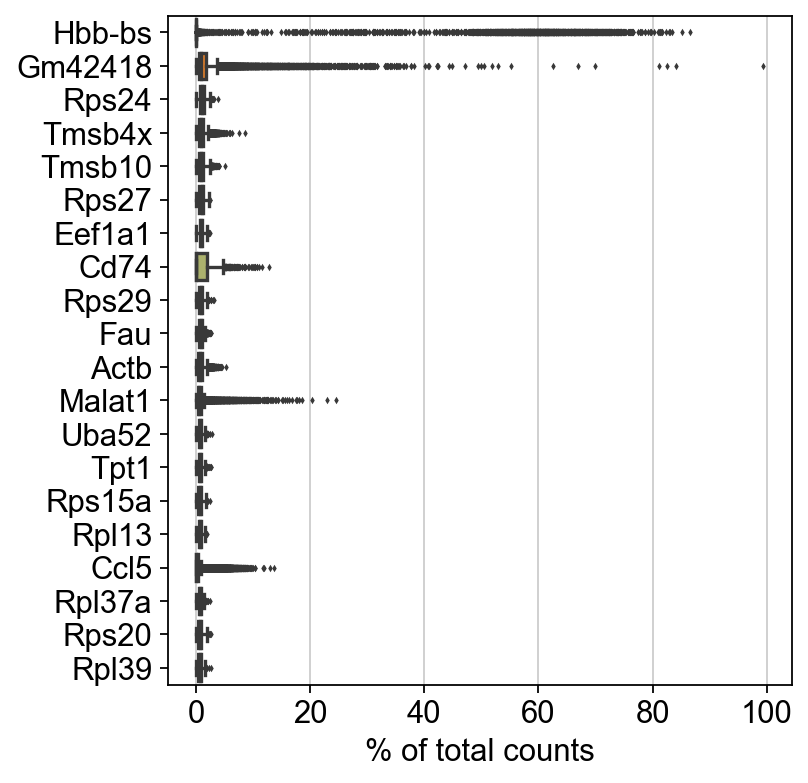

In [17]:
%matplotlib inline

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Inital filtering

- By gene number

In [18]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 1666 cells that have less than 200 genes expressed
41438 27998


- By cell number

In [19]:
sc.pp.filter_genes(sample_object, min_cells = 3)


filtered out 10422 genes that are detected in less than 3 cells


### QC metrics

In [20]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('mt-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("Rps","Rpl"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^Hb[^(P)]"))
sample_object.var

gene_ids    feature_types  n_cells     mt   ribo  \
Rp1             ENSMUSG00000025900  Gene Expression        7  False  False   
Sox17           ENSMUSG00000025902  Gene Expression      185  False  False   
Mrpl15          ENSMUSG00000033845  Gene Expression    11168  False  False   
Lypla1          ENSMUSG00000025903  Gene Expression     9535  False  False   
Gm37988         ENSMUSG00000104217  Gene Expression       30  False  False   
...                            ...              ...      ...    ...    ...   
AC168977.2      ENSMUSG00000094915  Gene Expression      483  False  False   
AC168977.1      ENSMUSG00000079808  Gene Expression      228  False  False   
PISD            ENSMUSG00000095041  Gene Expression    13731  False  False   
DHRSX           ENSMUSG00000063897  Gene Expression     5804  False  False   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression      375  False  False   

                   hb  
Rp1             False  
Sox17           False  
Mrpl15          False  
Lypla1          False  
Gm37988         False  
...               ...  
AC168977.2      False  
AC168977.1      False  
PISD            False  
DHRSX           False  
CAAA01147332.1  False  

[17576 rows x 6 columns]

- Check values present in new columns

In [22]:
sample_object.var['mt'].value_counts()

mt
False    17563
True        13
Name: count, dtype: int64

In [23]:
sample_object.var['ribo'].value_counts()


ribo
False    17465
True       111
Name: count, dtype: int64

In [24]:
sample_object.var['hb'].value_counts()

hb
False    17566
True        10
Name: count, dtype: int64

In [25]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [26]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('mt-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [27]:
sample_object

AnnData object with n_obs × n_vars = 41438 × 17576
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### QC visualisation

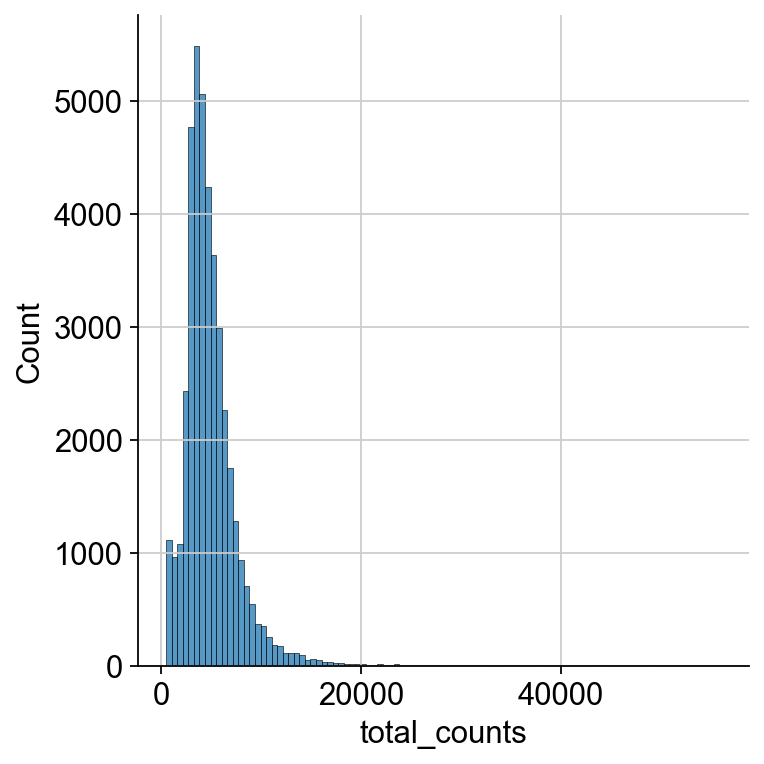

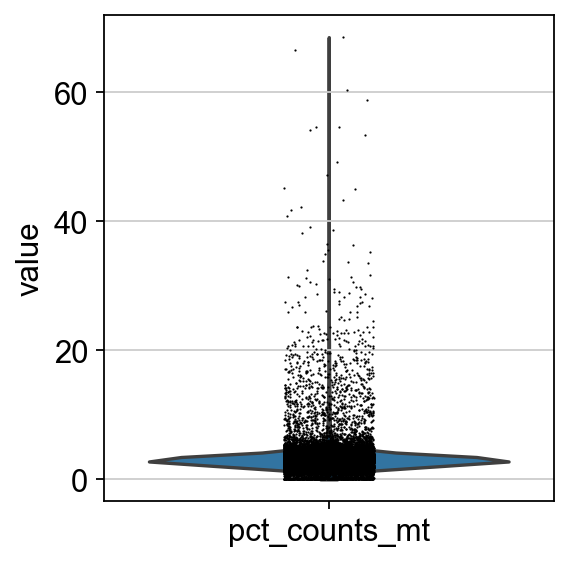

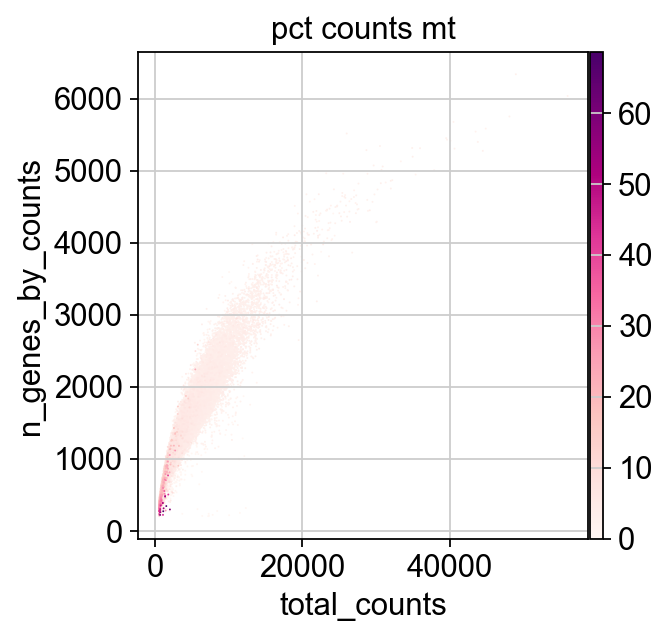

In [28]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

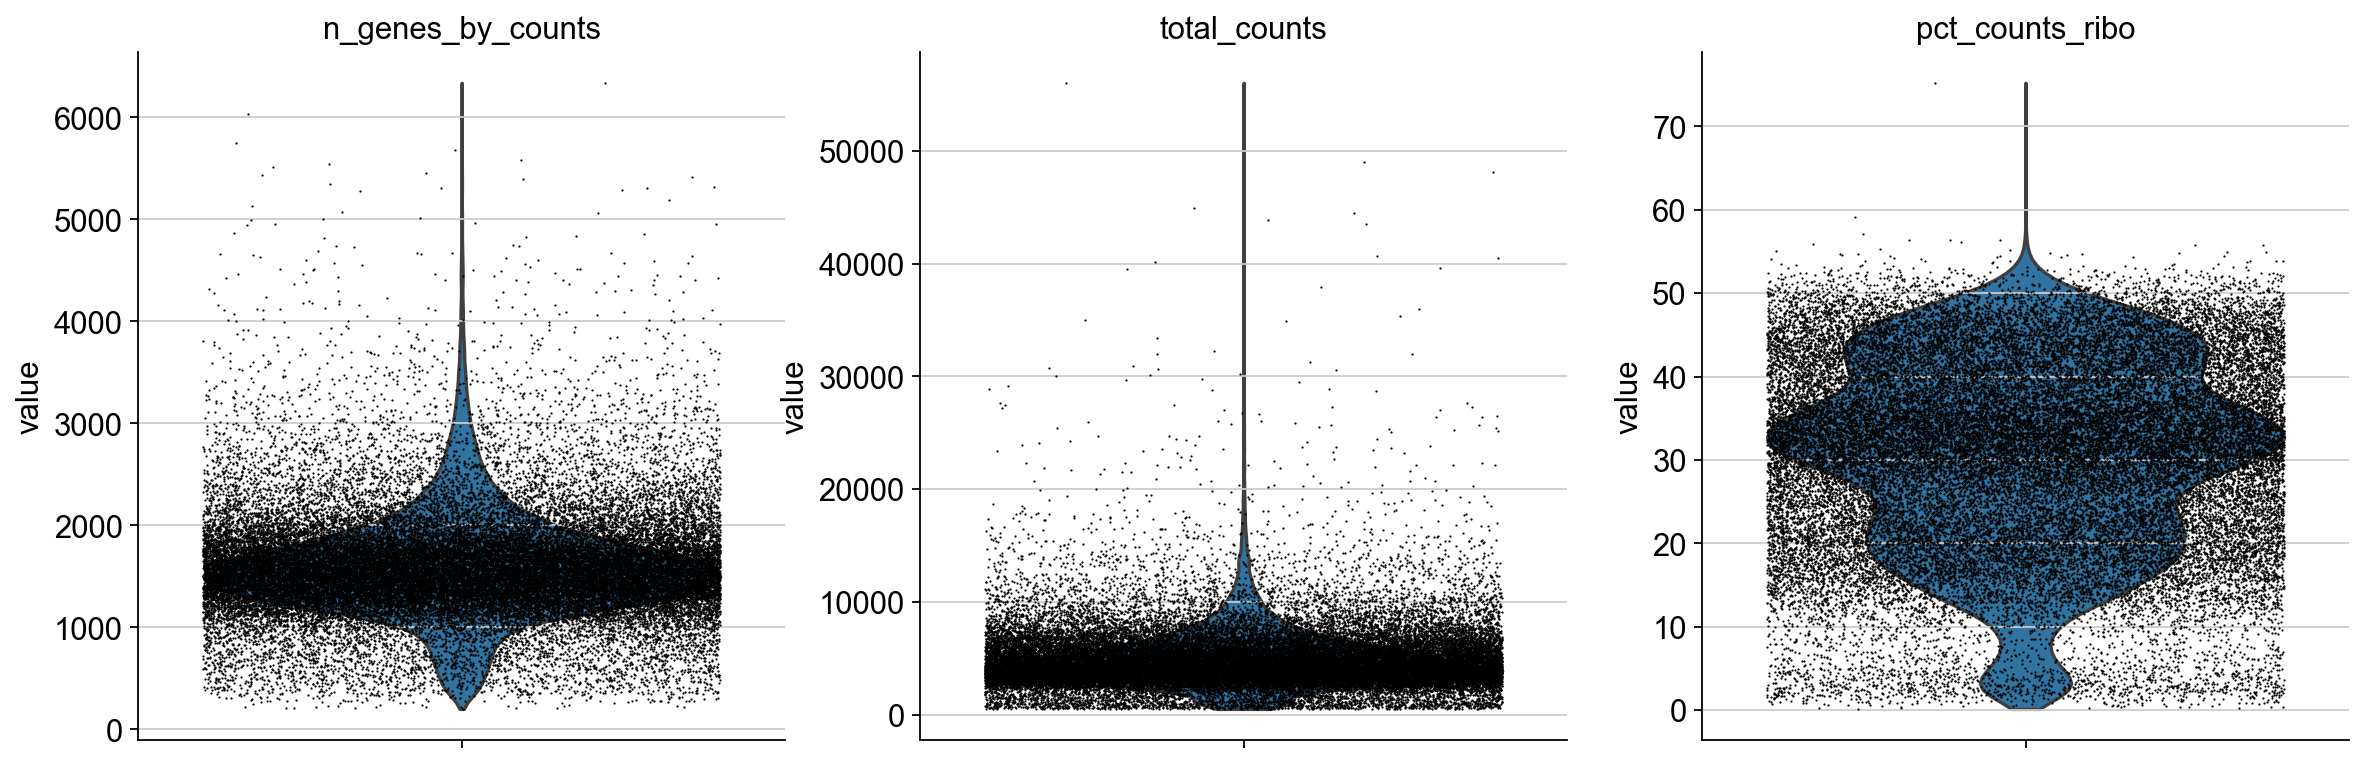

In [29]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

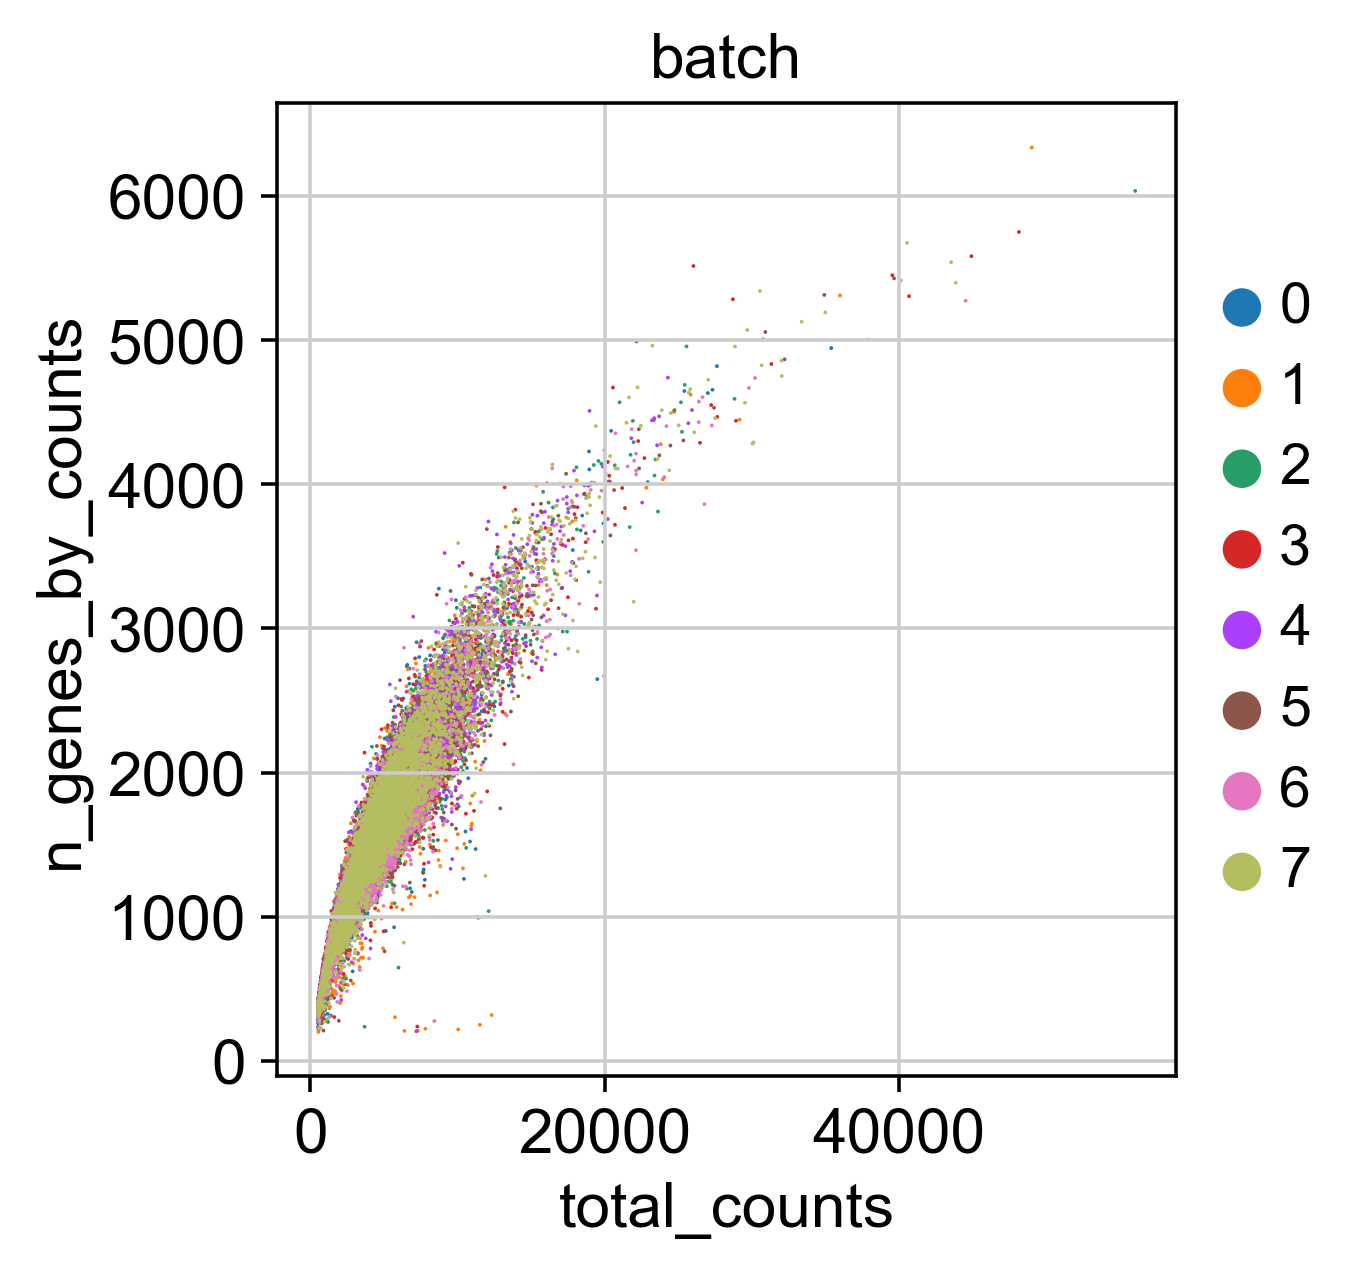

In [68]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "batch")

### QC-based filtering

In [30]:
sample_object.obs.head()

batch  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGCAATATG-1-0     0     1182               1182        1955.0   
AAACCTGAGCATCATC-1-0     0     1916               1916        6060.0   
AAACCTGCAAGTACCT-1-0     0     1740               1740        3536.0   
AAACCTGCAGAGTGTG-1-0     0     1301               1301        3279.0   
AAACCTGCAGATCGGA-1-0     0      953                953        1815.0   

                      total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGCAATATG-1-0             15.0       0.767263               87.0   
AAACCTGAGCATCATC-1-0            224.0       3.696370             2157.0   
AAACCTGCAAGTACCT-1-0             60.0       1.696833              435.0   
AAACCTGCAGAGTGTG-1-0            106.0       3.232693             1052.0   
AAACCTGCAGATCGGA-1-0             61.0       3.360882              438.0   

                      pct_counts_ribo  total_counts_hb  pct_counts_hb  \
AAACCTGAGCAATATG-1-0         4.450128              1.0       0.051151   
AAACCTGAGCATCATC-1-0        35.594059              1.0       0.016502   
AAACCTGCAAGTACCT-1-0        12.302036              0.0       0.000000   
AAACCTGCAGAGTGTG-1-0        32.082951             47.0       1.433364   
AAACCTGCAGATCGGA-1-0        24.132231              1.0       0.055096   

                      percent_mt2  n_counts  
AAACCTGAGCAATATG-1-0     0.007673    1955.0  
AAACCTGAGCATCATC-1-0     0.036964    6060.0  
AAACCTGCAAGTACCT-1-0     0.016968    3536.0  
AAACCTGCAGAGTGTG-1-0     0.032327    3279.0  
AAACCTGCAGATCGGA-1-0     0.033609    1815.0

In [31]:
sample_object.shape

(41438, 17576)

In [32]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()


batch  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGCAATATG-1-0     0     1182               1182        1955.0   
AAACCTGAGCATCATC-1-0     0     1916               1916        6060.0   
AAACCTGCAAGTACCT-1-0     0     1740               1740        3536.0   
AAACCTGCAGAGTGTG-1-0     0     1301               1301        3279.0   
AAACCTGCAGATCGGA-1-0     0      953                953        1815.0   

                      total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGCAATATG-1-0             15.0       0.767263               87.0   
AAACCTGAGCATCATC-1-0            224.0       3.696370             2157.0   
AAACCTGCAAGTACCT-1-0             60.0       1.696833              435.0   
AAACCTGCAGAGTGTG-1-0            106.0       3.232693             1052.0   
AAACCTGCAGATCGGA-1-0             61.0       3.360882              438.0   

                      pct_counts_ribo  total_counts_hb  pct_counts_hb  \
AAACCTGAGCAATATG-1-0         4.450128              1.0       0.051151   
AAACCTGAGCATCATC-1-0        35.594059              1.0       0.016502   
AAACCTGCAAGTACCT-1-0        12.302036              0.0       0.000000   
AAACCTGCAGAGTGTG-1-0        32.082951             47.0       1.433364   
AAACCTGCAGATCGGA-1-0        24.132231              1.0       0.055096   

                      percent_mt2  n_counts  mt_ok  
AAACCTGAGCAATATG-1-0     0.007673    1955.0   True  
AAACCTGAGCATCATC-1-0     0.036964    6060.0   True  
AAACCTGCAAGTACCT-1-0     0.016968    3536.0   True  
AAACCTGCAGAGTGTG-1-0     0.032327    3279.0   True  
AAACCTGCAGATCGGA-1-0     0.033609    1815.0   True

In [33]:
sample_object.obs.mt_ok.value_counts()

mt_ok
True     41297
False      141
Name: count, dtype: int64

In [34]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 41438
Number of cells after filtering of low quality cells: 41297


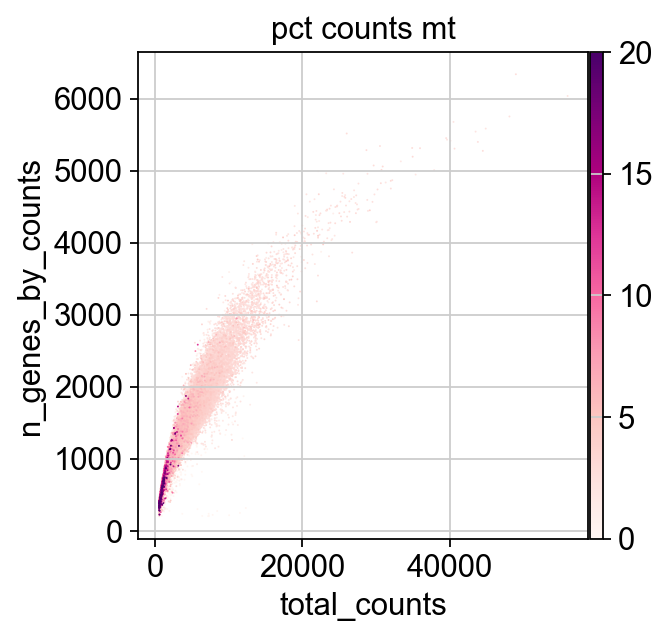

In [35]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Add sample sex covariate

In [36]:
annot = sc.queries.biomart_annotations(
        "mmusculus",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [37]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                     
mt-Tf               ENSMUSG00000064336               1            68   
mt-Rnr1             ENSMUSG00000064337              70          1024   
mt-Tv               ENSMUSG00000064338            1025          1093   
mt-Rnr2             ENSMUSG00000064339            1094          2675   
mt-Tl1              ENSMUSG00000064340            2676          2750   

                   chromosome_name  
external_gene_name                  
mt-Tf                           MT  
mt-Rnr1                         MT  
mt-Tv                           MT  
mt-Rnr2                         MT  
mt-Tl1                          MT

In [38]:
annot.chromosome_name.value_counts().head

<bound method NDFrame.head of chromosome_name
7             4820
2             3891
1             3549
5             3345
6             3219
11            3125
3             2955
4             2948
9             2911
10            2693
X             2662
8             2628
14            2562
13            2560
12            2552
17            2400
15            1933
16            1649
Y             1629
19            1457
18            1428
MT              37
JH584299.1      12
GL456211.1       7
GL456221.1       7
GL456354.1       5
GL456210.1       5
JH584298.1       3
JH584297.1       3
JH584296.1       3
GL456212.1       2
GL456385.1       2
GL456219.1       2
JH584304.1       1
GL456372.1       1
JH584303.1       1
GL456381.1       1
GL456239.1       1
JH584295.1       1
Name: count, dtype: int64>

- Y chromosome

In [39]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index([], dtype='object')

In [40]:
# List of gene names on Y chromosome
desired_category = "Y"

# Select rows based on the category
selected_rows = annot[annot['chromosome_name'] == desired_category]
selected_rows.value_counts()

ensembl_gene_id     start_position  end_position  chromosome_name
ENSMUSG00000000103  2106015         2170409       Y                  1
ENSMUSG00000101512  65840255        65843494      Y                  1
ENSMUSG00000101530  64569362        64570055      Y                  1
ENSMUSG00000101529  67727701        67731047      Y                  1
ENSMUSG00000101528  74481800        74508227      Y                  1
                                                                    ..
ENSMUSG00000100288  85642562        85644875      Y                  1
ENSMUSG00000100286  80547675        80551023      Y                  1
ENSMUSG00000100285  3383123         3384035       Y                  1
ENSMUSG00000100284  83628709        83629404      Y                  1
ENSMUSG00002076920  991657          991716        Y                  1
Name: count, Length: 1629, dtype: int64

In [41]:
is_present = selected_rows.isin(sample_object.var_names.values)

any_present = is_present.any().any()

# Print the result
print(any_present)

False


In [42]:
# Compare annot with sample_object.var by gene_id

# Convert the var dataframe of AnnData object to pandas dataframe
df_var = pd.DataFrame(sample_object.var)
df_var


gene_ids    feature_types  n_cells     mt   ribo  \
Rp1             ENSMUSG00000025900  Gene Expression        7  False  False   
Sox17           ENSMUSG00000025902  Gene Expression      185  False  False   
Mrpl15          ENSMUSG00000033845  Gene Expression    11168  False  False   
Lypla1          ENSMUSG00000025903  Gene Expression     9535  False  False   
Gm37988         ENSMUSG00000104217  Gene Expression       30  False  False   
...                            ...              ...      ...    ...    ...   
AC168977.2      ENSMUSG00000094915  Gene Expression      483  False  False   
AC168977.1      ENSMUSG00000079808  Gene Expression      228  False  False   
PISD            ENSMUSG00000095041  Gene Expression    13731  False  False   
DHRSX           ENSMUSG00000063897  Gene Expression     5804  False  False   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression      375  False  False   

                   hb  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
Rp1             False                  7     0.000241              99.983107   
Sox17           False                185     0.007481              99.553550   
Mrpl15          False              11168     0.327646              73.048892   
Lypla1          False               9535     0.273034              76.989720   
Gm37988         False                 30     0.000724              99.927603   
...               ...                ...          ...                    ...   
AC168977.2      False                483     0.012670              98.834403   
AC168977.1      False                228     0.005695              99.449780   
PISD            False              13731     0.501858              66.863748   
DHRSX           False               5804     0.159974              85.993533   
CAAA01147332.1  False                375     0.009412              99.095034   

                total_counts  
Rp1                     10.0  
Sox17                  310.0  
Mrpl15               13577.0  
Lypla1               11314.0  
Gm37988                 30.0  
...                      ...  
AC168977.2             525.0  
AC168977.1             236.0  
PISD                 20796.0  
DHRSX                 6629.0  
CAAA01147332.1         390.0  

[17576 rows x 10 columns]

In [43]:
df_var.rename(columns={'gene_ids': 'ensembl_gene_id'}, inplace=True)
df_var

ensembl_gene_id    feature_types  n_cells     mt   ribo  \
Rp1             ENSMUSG00000025900  Gene Expression        7  False  False   
Sox17           ENSMUSG00000025902  Gene Expression      185  False  False   
Mrpl15          ENSMUSG00000033845  Gene Expression    11168  False  False   
Lypla1          ENSMUSG00000025903  Gene Expression     9535  False  False   
Gm37988         ENSMUSG00000104217  Gene Expression       30  False  False   
...                            ...              ...      ...    ...    ...   
AC168977.2      ENSMUSG00000094915  Gene Expression      483  False  False   
AC168977.1      ENSMUSG00000079808  Gene Expression      228  False  False   
PISD            ENSMUSG00000095041  Gene Expression    13731  False  False   
DHRSX           ENSMUSG00000063897  Gene Expression     5804  False  False   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression      375  False  False   

                   hb  n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
Rp1             False                  7     0.000241              99.983107   
Sox17           False                185     0.007481              99.553550   
Mrpl15          False              11168     0.327646              73.048892   
Lypla1          False               9535     0.273034              76.989720   
Gm37988         False                 30     0.000724              99.927603   
...               ...                ...          ...                    ...   
AC168977.2      False                483     0.012670              98.834403   
AC168977.1      False                228     0.005695              99.449780   
PISD            False              13731     0.501858              66.863748   
DHRSX           False               5804     0.159974              85.993533   
CAAA01147332.1  False                375     0.009412              99.095034   

                total_counts  
Rp1                     10.0  
Sox17                  310.0  
Mrpl15               13577.0  
Lypla1               11314.0  
Gm37988                 30.0  
...                      ...  
AC168977.2             525.0  
AC168977.1             236.0  
PISD                 20796.0  
DHRSX                 6629.0  
CAAA01147332.1         390.0  

[17576 rows x 10 columns]

In [44]:
# Merge df_var with annot
merged_df = df_var.merge(annot, on='ensembl_gene_id', how='left')
merged_df

ensembl_gene_id    feature_types  n_cells     mt   ribo     hb  \
0      ENSMUSG00000025900  Gene Expression        7  False  False  False   
1      ENSMUSG00000025902  Gene Expression      185  False  False  False   
2      ENSMUSG00000033845  Gene Expression    11168  False  False  False   
3      ENSMUSG00000025903  Gene Expression     9535  False  False  False   
4      ENSMUSG00000104217  Gene Expression       30  False  False  False   
...                   ...              ...      ...    ...    ...    ...   
17571  ENSMUSG00000094915  Gene Expression      483  False  False  False   
17572  ENSMUSG00000079808  Gene Expression      228  False  False  False   
17573  ENSMUSG00000095041  Gene Expression    13731  False  False  False   
17574  ENSMUSG00000063897  Gene Expression     5804  False  False  False   
17575  ENSMUSG00000095742  Gene Expression      375  False  False  False   

       n_cells_by_counts  mean_counts  pct_dropout_by_counts  total_counts  \
0                      7     0.000241              99.983107          10.0   
1                    185     0.007481              99.553550         310.0   
2                  11168     0.327646              73.048892       13577.0   
3                   9535     0.273034              76.989720       11314.0   
4                     30     0.000724              99.927603          30.0   
...                  ...          ...                    ...           ...   
17571                483     0.012670              98.834403         525.0   
17572                228     0.005695              99.449780         236.0   
17573              13731     0.501858              66.863748       20796.0   
17574               5804     0.159974              85.993533        6629.0   
17575                375     0.009412              99.095034         390.0   

       start_position  end_position chromosome_name  
0           4069780.0     4479464.0               1  
1           4561154.0     4567577.0               1  
2           4843429.0     4855962.0               1  
3           4878011.0     4918633.0               1  
4           4878115.0     4956993.0               1  
...               ...           ...             ...  
17571         31967.0       34932.0      GL456212.1  
17572        128555.0      150452.0      GL456212.1  
17573         52190.0       59690.0      JH584304.1  
17574             NaN           NaN             NaN  
17575            66.0        1479.0      JH584295.1  

[17576 rows x 13 columns]

In [45]:
merged_df.chromosome_name.value_counts()

chromosome_name
11            1433
7             1368
2             1357
5             1143
1             1100
4             1030
9              963
6              926
8              895
3              886
17             856
10             801
15             651
13             649
14             588
12             575
19             557
X              535
16             526
18             423
MT              13
GL456211.1       5
GL456221.1       5
GL456210.1       4
GL456212.1       2
Y                1
JH584304.1       1
JH584295.1       1
Name: count, dtype: int64

In [46]:
# Find identity of gene on Y
desired_value = 'Y'

# Find row where the column value matches the desired value
matching_rows = merged_df[merged_df['chromosome_name'] == desired_value]

print(matching_rows)

          ensembl_gene_id    feature_types  n_cells     mt   ribo     hb  \
16542  ENSMUSG00000096768  Gene Expression     4485  False  False  False   

       n_cells_by_counts  mean_counts  pct_dropout_by_counts  total_counts  \
16542               4485     0.123172              89.176601        5104.0   

       start_position  end_position chromosome_name  
16542      90796007.0    90827734.0               Y  


In [47]:
# Check if there are shared genes present in sample_object and annot

is_present = sample_object.var['gene_ids'].isin(annot['ensembl_gene_id'])
is_present.value_counts()


gene_ids
True     17294
False      282
Name: count, dtype: int64

- X chromosome

In [48]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['Nudt11', 'Nudt10', 'Shroom4', 'Dgkk', 'Clcn5', 'Usp27x', 'Ppp1r3f',
       'Foxp3', 'Ccdc22', 'Cacna1f',
       ...
       'Tlr7', 'Prps2', 'Msl3', 'Arhgap6', 'Gm15261', 'Amelx', 'Hccs', 'Mid1',
       'Gm15726', 'Gm15247'],
      dtype='object', length=502)

In [49]:
chrX_sum = sample_object[:, chrX_genes].X.sum(axis=1)
total_sum = sample_object.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
sample_object.obs['percent_chrX'] = (np.asarray(chrX_sum).flatten() / np.asarray(total_sum).flatten()) * 100
sample_object.obs

batch  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGCAATATG-1-0     0     1182               1182        1955.0   
AAACCTGAGCATCATC-1-0     0     1916               1916        6060.0   
AAACCTGCAAGTACCT-1-0     0     1740               1740        3536.0   
AAACCTGCAGAGTGTG-1-0     0     1301               1301        3279.0   
AAACCTGCAGATCGGA-1-0     0      953                953        1815.0   
...                    ...      ...                ...           ...   
TTTGTCATCAAACCAC-1-7     7     1021               1020        3334.0   
TTTGTCATCTCCAACC-1-7     7     2150               2150        7126.0   
TTTGTCATCTCCCTGA-1-7     7     1887               1887        6784.0   
TTTGTCATCTCGAGTA-1-7     7     1316               1316        3996.0   
TTTGTCATCTTTCCTC-1-7     7     1820               1820        4703.0   

                      total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGCAATATG-1-0             15.0       0.767263               87.0   
AAACCTGAGCATCATC-1-0            224.0       3.696370             2157.0   
AAACCTGCAAGTACCT-1-0             60.0       1.696833              435.0   
AAACCTGCAGAGTGTG-1-0            106.0       3.232693             1052.0   
AAACCTGCAGATCGGA-1-0             61.0       3.360882              438.0   
...                               ...            ...                ...   
TTTGTCATCAAACCAC-1-7              4.0       0.119976               71.0   
TTTGTCATCTCCAACC-1-7            245.0       3.438114             2472.0   
TTTGTCATCTCCCTGA-1-7            237.0       3.493514             3011.0   
TTTGTCATCTCGAGTA-1-7             72.0       1.801802             1817.0   
TTTGTCATCTTTCCTC-1-7            131.0       2.785456             1307.0   

                      pct_counts_ribo  total_counts_hb  pct_counts_hb  \
AAACCTGAGCAATATG-1-0         4.450128              1.0       0.051151   
AAACCTGAGCATCATC-1-0        35.594059              1.0       0.016502   
AAACCTGCAAGTACCT-1-0        12.302036              0.0       0.000000   
AAACCTGCAGAGTGTG-1-0        32.082951             47.0       1.433364   
AAACCTGCAGATCGGA-1-0        24.132231              1.0       0.055096   
...                               ...              ...            ...   
TTTGTCATCAAACCAC-1-7         2.129574              0.0       0.000000   
TTTGTCATCTCCAACC-1-7        34.689869              1.0       0.014033   
TTTGTCATCTCCCTGA-1-7        44.383846              0.0       0.000000   
TTTGTCATCTCGAGTA-1-7        45.470470              1.0       0.025025   
TTTGTCATCTTTCCTC-1-7        27.790773              0.0       0.000000   

                      percent_mt2  n_counts  mt_ok  percent_chrX  
AAACCTGAGCAATATG-1-0     0.007673    1955.0   True      1.994885  
AAACCTGAGCATCATC-1-0     0.036964    6060.0   True      3.762376  
AAACCTGCAAGTACCT-1-0     0.016968    3536.0   True      2.290724  
AAACCTGCAGAGTGTG-1-0     0.032327    3279.0   True      3.171699  
AAACCTGCAGATCGGA-1-0     0.033609    1815.0   True      3.856750  
...                           ...       ...    ...           ...  
TTTGTCATCAAACCAC-1-7     0.001200    3334.0   True      2.219556  
TTTGTCATCTCCAACC-1-7     0.034381    7126.0   True      4.055571  
TTTGTCATCTCCCTGA-1-7     0.034935    6784.0   True      3.832547  
TTTGTCATCTCGAGTA-1-7     0.018018    3996.0   True      3.703704  
TTTGTCATCTTTCCTC-1-7     0.027855    4703.0   True      3.593451  

[41297 rows x 14 columns]

In [50]:
# Graph of samples with X chrom
sample_object.obs.percent_chrX.value_counts()

percent_chrX
3.448276    37
3.703704    29
3.846154    26
4.000000    24
3.571429    23
            ..
3.327013     1
4.681434     1
3.184605     1
2.946029     1
3.593451     1
Name: count, Length: 35947, dtype: int64

In [51]:
sample_object.obs.shape

(41297, 14)

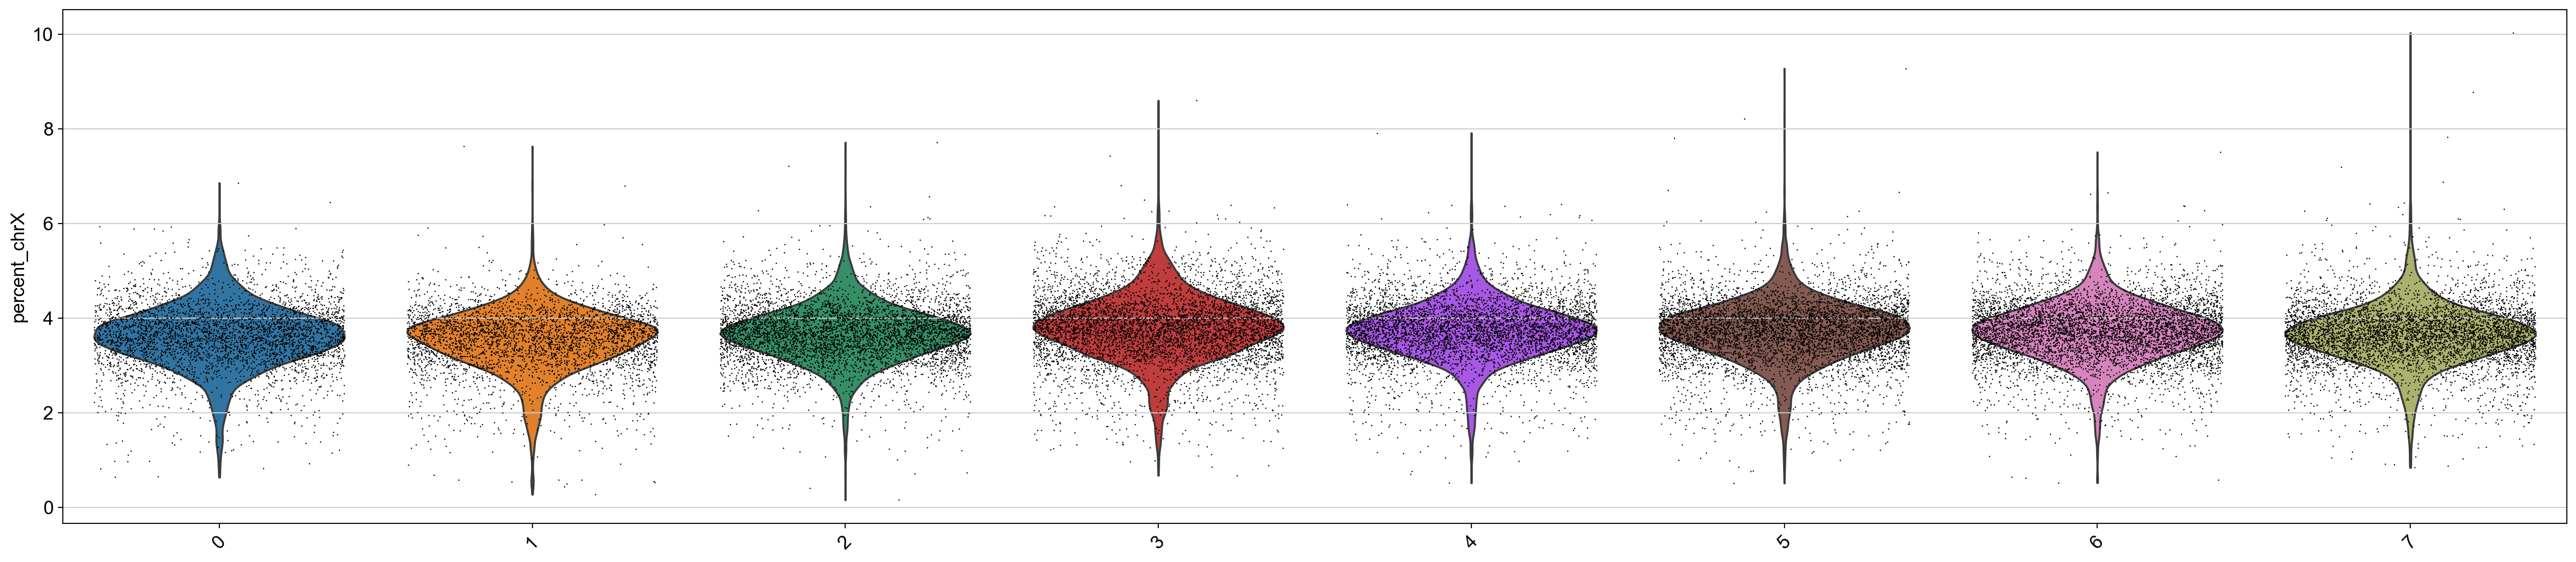

In [52]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX"], jitter = 0.4, groupby = 'batch', rotation = 45)

### Cell cycle scores

In [53]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt https://raw.githubusercontent.com/hbc/tinyatlas/master/cell_cycle/Mus_musculus.csv

zsh:1: parse error near `https://raw.githubus...'


In [54]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
g2m_genes = cell_cycle_genes[:54]
s_genes = cell_cycle_genes[54:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
96


In [55]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Xcl1', 'Gsn', 'Prg2', 'Cst3', 'Bpifa1', 'Bpifb1', 'Slpi', 'Tmsb4x', 'S100a8', 'S100a9', 'Ccl21a', 'Cd52', 'Jchain', 'Cxcl2', 'Actb', 'Tmsb10', 'Reg3g', 'Ftl1', 'Hbb-bt', 'Hbb-bs', 'Hsp90b1', 'Lyz2', 'Sftpa1', 'Gzmb', 'Sftpc', 'Lars2', 'Hba-a1', 'Hba-a2', 'Scgb3a1', 'Ccl5', 'Ccl3', 'Ccl4', 'Cbr2', 'Gzma', 'Ly6c2', 'Retnlg', 'Gm26917', 'Gm42418', 'AY036118', 'Scgb3a2', 'Cd74', 'Malat1', 'Scgb1a1', 'Fth1', 'mt-Co1', 'mt-Atp8']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    642 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


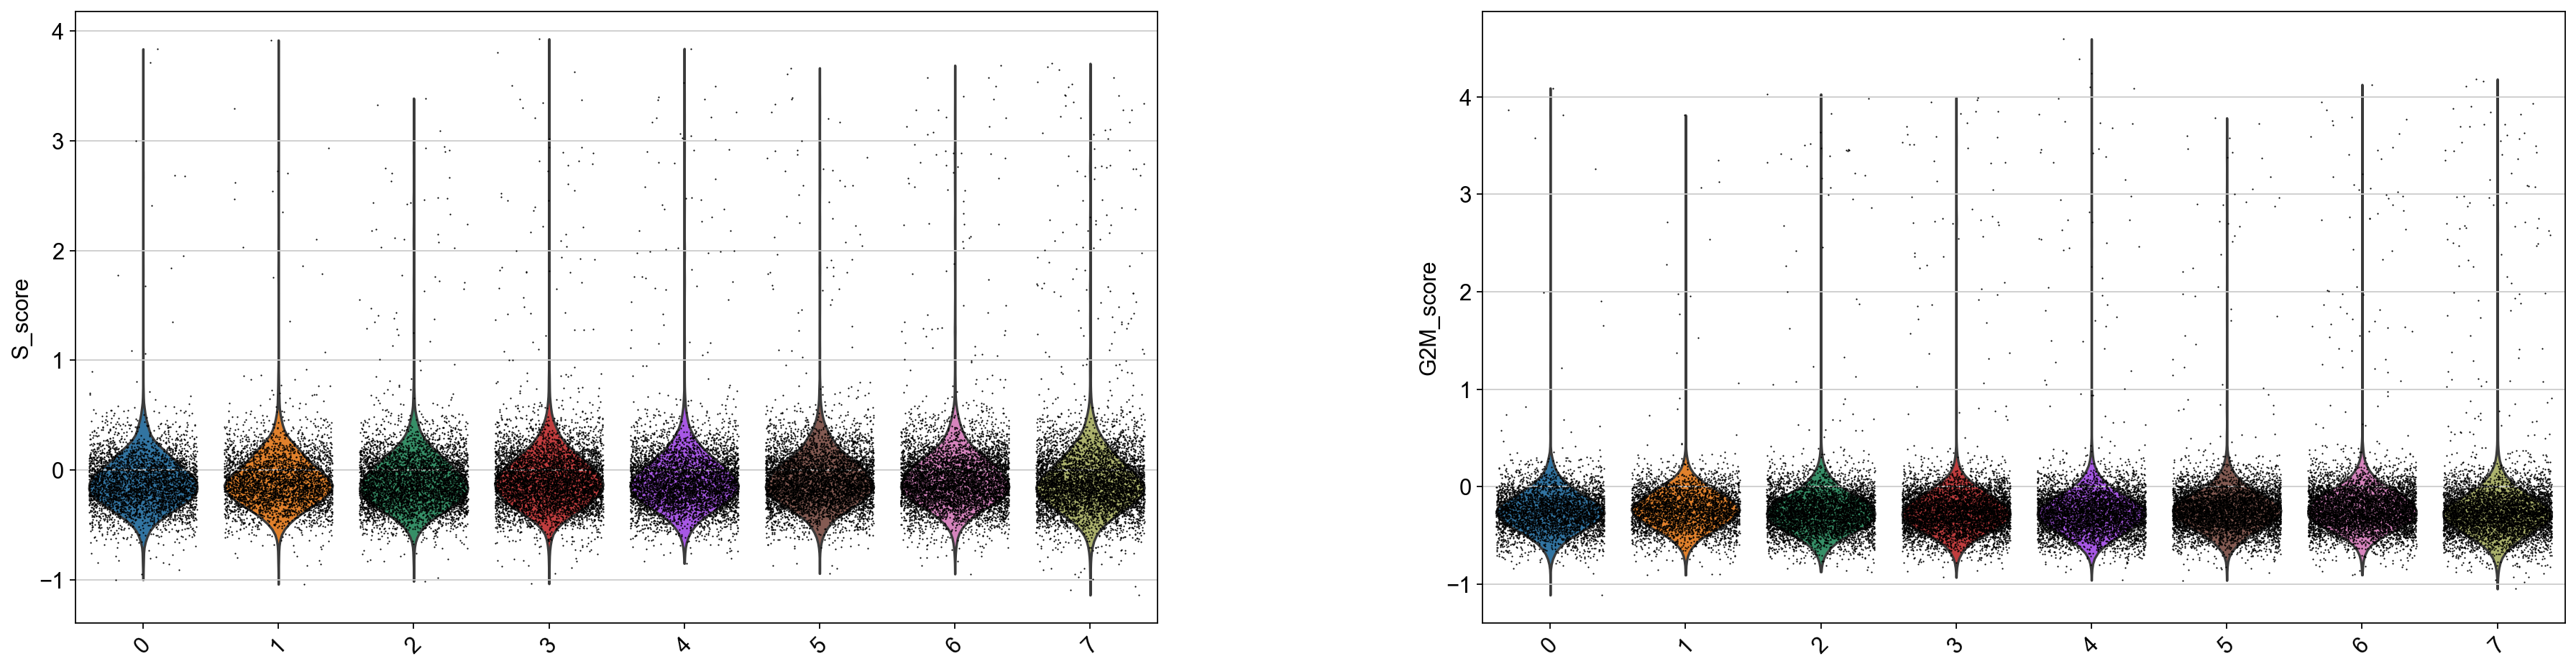

In [56]:
# Set specific figure params

sc.set_figure_params(figsize=(10, 7))
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'batch', rotation = 45)

In [57]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 41297 × 17576
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'mt_ok', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'

### Predict doublets

In [61]:
import scrublet

In [62]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:241: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 43.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.0%
Elapsed time: 38.9 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

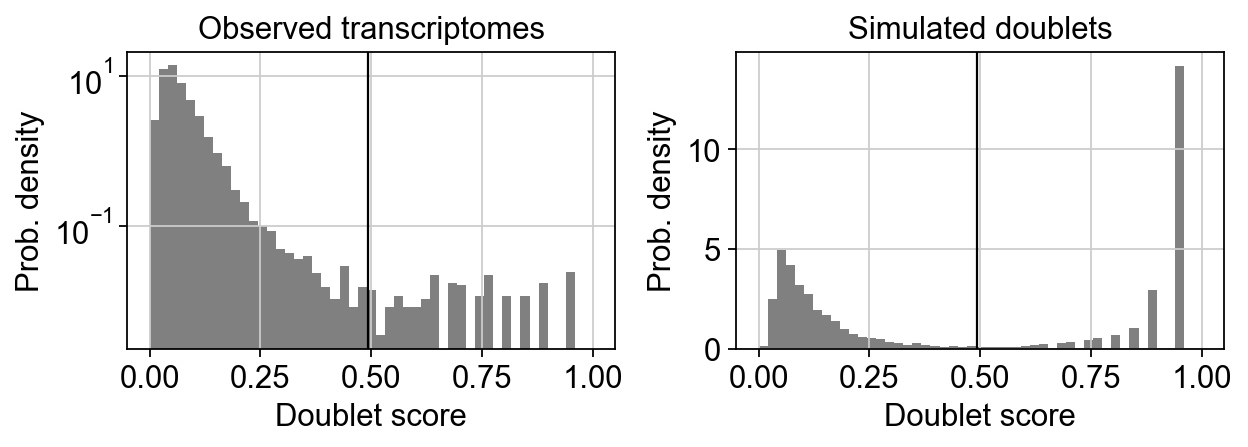

In [63]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [64]:
sum(sample_object.obs['predicted_doublets'])

188

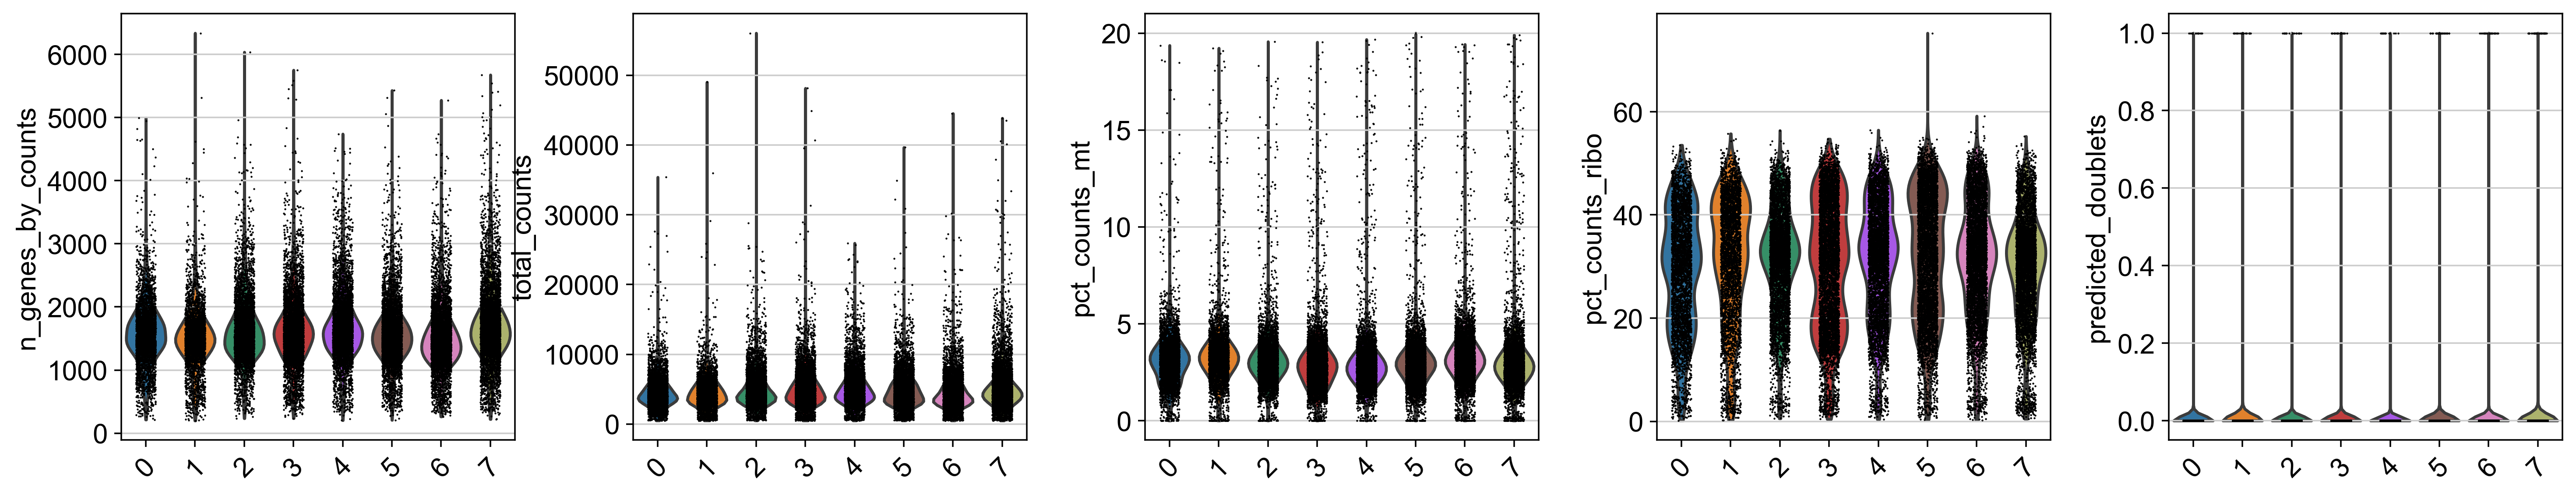

In [65]:
# Re-set figure params
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

# Plot doublet detection results
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'batch', rotation = 45, multi_panel=False)

### Prepare counts for individual slots

In [66]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 41297 × 17576
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'mt_ok', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [67]:
sample_object.write('/Volumes/Lacie/data_lake/Mairi_example/processed_files/abridged_qc/mice/Akter2021_scrna_wholelung_mm_230308_qcd.h5ad')